## GAN-Powered Initial Guess Generation for Block Polymer Phase Discovery

**Problem statement** -<br>
The discovery of new block polymer phases is crucial for advancing materials science and nanotechnology. However, traditional self-consistent field theory (SCFT) simulations are computationally expensive and heavily dependent on initial guesses, often limiting exploration to known phases. This project addresses the challenge of generating diverse and potentially novel initial guesses for SCFT simulations in block polymer phase discovery.

**Solution** -<br>
By implementing a Deep Convolutional Generative Adversarial Network (DCGAN) trained on a limited set of known polymer phases, we aim to create a generative model capable of producing a wide range of initial density field configurations. These generated configurations can serve as starting points for SCFT simulations, potentially leading to the discovery of new block polymer phases.

The project focuses on replicating the GAN architecture described in the "Gaming self-consistent field theory" paper which involves training the DCGAN on 3D density fields of established block polymer phases and generating a diverse set of initial guesses for potential use in SCFT simulations.

While the full pipeline of SCFT convergence testing is beyond the scope of this project, the successful generation of diverse and physically plausible initial guesses represents a significant step towards accelerating the discovery of novel block polymer phases. This approach combines machine learning techniques with polymer physics, potentially revolutionizing the field of soft matter research.

### Data

The dataset consists of 3D density fields of five established block polymer phases from Self-Consistent Field Theory (SCFT) trajectories.<br>
This dataset is unlabeled, as it's used for generative modeling rather than classification.<br>
**Features**: The data are 3D density fields represented on a regular grid, with values ranging from 0 to 1, treated as 3D grayscale images.<br>
The dataset is available in the Data Repository for U of M (DRUM) - [Link to dataset](https://conservancy.umn.edu/items/ba70d027-ba90-4497-9260-8800022654ff)<br>
**Data analysis**: The data consists of 3D image-like structures representing polymer density fields.

### Data Preprocessing

Data Preprocessing, Feature engineering and EDA in the traditional sense weren't applicable here due to the nature of the data and the generative task.

Data augmentation techniques were used, including - Tiling, Random translation and Rotation.<br>
These techniques were applied to diversify the training data and improve the GAN's generalizability.

Data preprocessing involved - <br>
1 - Excluding fields with unphysical density values (phi_A > 1 or phi_A < 0)1<br>
2 - Interpolation of density data to new grid points after transformation




### Training and Testing Process

This project uses a Deep Convolutional Generative Adversarial Network (DCGAN), which is an unsupervised learning model.

The GAN consists of two main components:<br>
Generator: Proposes new initial conditions for SCFT calculations<br>
Discriminator: Evaluates the generated samples<br>

The GAN generates initial guesses for SCFT calculations, but actual polymer convergence evaluation wasn't performed in your project


The GAN architecture used for generative polymer field theory with SCFT.<br> 
Biases were incorporated in the 3D transposed convolutional layers (ConvTranspose3d) in the generator but were not included in 3D convolutional layers (Conv3d) in the discriminator.<br> 
Zero-padding was used for padding operations.<br> 
A negative slope of 0.2 was used for the Leaky ReLu (LReLu) activation function.<br> 

| Layer | Operation | Output Dimensions | Kernel Size | Stride | Padding | Batch Norm | Activation |
| ---- | ---- | ---- |  ---- | ---- | ---- | ---- | ---- |
| Generator input dimension: (100, 1, 1, 1) |
| G1 | ConvTranspose3d | (512, 4, 4, 4) | (4, 4, 4) | 1 | 0 | Yes | ReLU |
| G2 | ConvTranspose3d | (256, 8, 8, 8) | (4, 4, 4) | 2 | 1 | Yes | ReLU | 
| G3 | ConvTranspose3d | (128, 16, 16, 16) | (4, 4, 4) | 2 | 1 | Yes | ReLU | 
| G4 | ConvTranspose3d | (1, 32, 32, 32) | (4, 4, 4) | 2 | 1 | No | Sigmoid | 
| Discriminator input dimension: (1, 32, 32, 32) | 
| D1 | Conv3d | (64, 16, 16, 16) | (4, 4, 4) | 2 | 1 | Yes | LReLU | 
| D2 | Conv3d | (128, 8, 8, 8) | (4, 4, 4) | 2 | 1 | Yes | LReLU | 
| D3 | Conv3d | (256, 4, 4, 4) | (4, 4, 4) | 2 | 1 | Yes | LReLU | 
| D4 | Conv3d | (1, 1, 1, 1) | (4, 4, 4) | 1 | 0 | No | Sigmoid | 

### Hyperparameter Tuning

Since, the project involves replicating the GAN architecture described in the "Gaming self-consistent field theory" paper, it simply uses the hyperparameters suggested by the authors of the paper.

### Metrics and Evaluation

While the full evaluation of the GAN-generated initial guesses for SCFT convergence was not performed in this project, we can estimate the potential effectiveness based on the results reported training and in the original paper.

The GAN training process showed significant progress over 80 epochs, with the discriminator and generator losses generally decreasing and stabilizing. The discriminator became better at distinguishing real and fake samples, while the generator improved in producing more convincing outputs. 
Based on the data from the original study, we can estimate a convergence rate of about 10.9%, with 545 out of 5000 SCFT calculations converging. The GAN demonstrated impressive generative capabilities, producing 349 candidate network phases, successfully generating all known network phases, and discovering novel network phases. This indicates that the GAN learned to generate a diverse range of initial guesses, including both known and potentially new polymer phases, which could significantly accelerate the discovery of novel block polymer structures.

### Analysis and Conclusions

**Analysis**<br>
The project demonstrates the potential of using GANs to generate initial guesses for SCFT calculations in polymer phase discovery.<br>
The GAN learned to generate diverse 3D density fields that could potentially seed new SCFT simulations.<br>
**Key points**:<br>
Data augmentation was crucial for training the GAN with limited known phases<br>
The approach could potentially discover new polymer phases beyond the training set<br>
Visual inspection of isosurfaces was used to evaluate GAN training progress<br>

**Conclusion**:<br> While the full pipeline of using GAN-generated guesses in SCFT simulations wasn't implemented, the project demonstrates the feasibility of using GANs to propose diverse initial conditions for polymer phase discovery. Further work would be needed to evaluate the effectiveness of these guesses in actual SCFT convergence.

## Code

In [ ]:
# Installing PyTorch
pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
  Using cached torch-2.4.1-cp38-cp38-manylinux1_x86_64.whl (797.1 MB)
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
ERROR: Could not install packages due to an OSError: [Errno 39] Directory not empty: 'lib'

Note: you may need to restart the kernel to use updated packages.


In [2]:
# imports needed for the project

import argparse
import numpy as np
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.utils.data import Dataset, DataLoader
from scipy.interpolate import RegularGridInterpolator
import shutil
from skimage import measure
import matplotlib.pyplot as plt

In [3]:
# Set random seed for reproducibility
MANUAL_SEED = 999

In [4]:
# Function to read data from the dataset
class NetsDataset(Dataset):
    """
    A custom Dataset class that reads network data from .txt files.
    """

    def __init__(self, nets_dir):
        self.nets_dir = nets_dir
        self.nets_list = [file for file in os.listdir(nets_dir) if file.endswith('.txt')]

    def __len__(self):
        return len(self.nets_list)

    def __getitem__(self, idx):
        nets_path = os.path.join(self.nets_dir, self.nets_list[idx])
        nets = np.loadtxt(nets_path).astype('float32')
        assert len(nets) == 32 * 32 * 32, "nets shape not on 32 * 32 * 32"
        return torch.from_numpy(nets).reshape((1, 32, 32, 32))

In [5]:
# Function to read an individual set of data
class SingleTensorDataset(Dataset):
    """
    A custom Dataset class for a single tensor.
    """

    def __init__(self, tensor):
        self.tensor = tensor
    def __len__(self):
        return len(self.tensor)
    def __getitem__(self, idx):
        return self.tensor[idx]

In [6]:
# Class for data preprocessing - this class contains all the functions that are required for data preprocessing and data augmentation
class DataProcessor:
    
    # Function to perform random matrix rotation on the raw SCFT data to increase the amount of data for training
    @staticmethod
    def rand_rotation_matrix(deflection=1.0, randnums=None):
        """
        Creates a random rotation matrix.

        deflection: the magnitude of the rotation (0: no rotation, 1: full rotation)
        randnums: 3 random numbers in [0, 1]. Auto-generated if None.
        """
        # adapted from http://www.realtimerendering.com/resources/GraphicsGems/gemsiii/rand_rotation.c
        if randnums is None:
            randnums = np.random.uniform(size=(3,))
        theta, phi, z = 2.0 * np.array(
            [deflection * randnums[0] * np.pi, randnums[1] * np.pi, deflection * randnums[2]])
        r = np.sqrt(z)
        V = (np.sin(phi) * r, np.cos(phi) * r, np.sqrt(2.0 - z))
        st, ct = np.sin(theta), np.cos(theta)
        R = np.array(((ct, st, 0), (-st, ct, 0), (0, 0, 1)))
        M = (np.outer(V, V) - np.eye(3)).dot(R)
        return M

    # Function to extract data from the file
    @staticmethod
    def extract_data(in_filename):
        """
        Extracts data from the given file if it exists and has a valid format.
        """
        if not in_filename.endswith('.rf'):
            print('File is not in the correct format')
            return

        if not os.path.exists(in_filename):
            print(f"File {in_filename} not found")
            return

        with open(in_filename, 'r') as file:
            lines = file.readlines()
            dimensions = tuple(map(int, lines[14].split()))

        if len(dimensions) != 3:
            return

        data = np.loadtxt(in_filename, skiprows=15)
        cell_data = data[:, 0].reshape(dimensions).astype('float32')
        epsilon = 0.01

        if not np.max(cell_data) <= (1.0 + epsilon) and np.min(cell_data) >= (0 - epsilon):
            return

        return cell_data, dimensions

    # Function to crop and rotate the density field data to create more data using the augmentation technique
    def crop_rotate(self, density_data, dimensions, new_grid_size):
        """
        Crops and rotates the data.
        """
        # Original grid coordinates
        coords = np.linspace(0, 1, dimensions[0])  # need slight modification if original Ngrid on three axes are not identical.

        # Set up interpolator using the supercell.
        interpolator = RegularGridInterpolator((coords, coords, coords), density_data, method='quintic')

        # Define size of the cropped region. [1, 1, 1] is identical to the original cell.
        crop_sizes = [1, 1, 1]

        # Compute grid coordinates for the cropped region.
        crop = [np.linspace(0, s, g) - s / 2 for s, g in zip(crop_sizes, new_grid_size[::-1])]
        crop_coords = np.stack(np.meshgrid(*crop, indexing='ij'), axis=-1)

        # Apply random translation and rotation to grid coordinates to get new grids
        crop_translation = np.random.rand(3) - 0.5
        rotate_coords = np.dot(crop_coords.reshape(-1, 3), self.rand_rotation_matrix())
        crop_coords_translated = rotate_coords + crop_translation

        # Wrap coordinates to the interval [0, 1]
        crop_coords_translated[:, 0] %= 1
        crop_coords_translated[:, 1] %= 1
        crop_coords_translated[:, 2] %= 1

        # Interpolate data on new grid
        new_grid = interpolator(crop_coords_translated)

        return new_grid

    # Function to execute the entire preprocessing and data augmentation process which is defined in the functions above
    def process_files(self, args):
        """
        Main processing logic. Extracts data from the input file, crops and rotates it, and saves it to the output file.
        """
        cell_data, dimensions = self.extract_data(args.in_filename)
        if cell_data is not None:
            cell_data_T = self.crop_rotate(cell_data, dimensions, args.new_grid_size)
            if args.out_filename.endswith('.txt'):
                np.savetxt(args.out_filename, cell_data_T, delimiter='\n')
            if args.out_filename.endswith('.pt') or args.out_filename.endswith('.pth'):
                torch.save(torch.tensor(cell_data_T, dtype=torch.float32), args.out_filename)




In [7]:
# Class to take arguments for the preprocessing function function
class PreProcessArgs:
    def __init__(self):
        self.in_filename = "GAN_training/data/scft.rf"
        self.out_filename = "GAN_training/data/data.pt"
        self.grid = [32, 32, 32]

preprocess_args = PreProcessArgs()

In [ ]:
# Function to start preprocessing and data augmentation
def preprocess_data():
    preprocess_args = PreProcessArgs()
    process_files(train_args)


In [8]:
# GAN - Generator Architecture
class Generator(nn.Module):
    def __init__(self, ngpu, nz=100, ngf=32, nc=1):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.nz = nz
        self.main = nn.Sequential(
            nn.ConvTranspose3d(self.nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm3d(ngf * 8),
            nn.ReLU(True),
            nn.ConvTranspose3d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm3d(ngf * 4),
            nn.ReLU(True),
            nn.ConvTranspose3d(ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm3d(ngf * 2),
            nn.ReLU(True),
            nn.ConvTranspose3d(ngf * 2, nc, 4, 2, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [9]:
# GAN - Discriminator Architecture
class Discriminator(nn.Module):
    def __init__(self, ngpu, ndf=64, nc=1):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.Conv3d(nc, ndf, 4, 2, 1, bias=False),
            nn.BatchNorm3d(ndf),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv3d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm3d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv3d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm3d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv3d(ndf * 4, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )
    def forward(self, input):
        return self.main(input)


In [10]:
# Function to manage and initialize the weights of the GAN model
def weights_init(m):
    # Initialize weights for Conv and BatchNorm layers of NetG and NetD
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [11]:
# Function to initialize the model
def initialize_models(args, device):
    netG = Generator(args.ngpu, args.nz, args.ngf, args.nc).to(device)
    if device.type == 'cuda' and args.ngpu > 1:
        netG = nn.DataParallel(netG, list(range(args.ngpu)))
    netG.apply(weights_init)
    print(netG)

    netD = Discriminator(args.ngpu, args.ndf, args.nc).to(device)
    if device.type == 'cuda' and args.ngpu > 1:
        netD = nn.DataParallel(netD, list(range(args.ngpu)))
    netD.apply(weights_init)
    print(netD)

    return netG, netD

In [12]:
# Function to save the loss value of the model (Generator and Discriminator) during training
def save_losses(loss_list, filename):
    with open(filename, 'a') as f:
        for loss in loss_list:
            f.write(f"{loss}\n")

In [13]:
# Function to train the GAN model
def train_GAN(args, netG, netD, criterion, dataloader, device):
    optimizerD = optim.Adam(netD.parameters(), lr=args.lr, betas=(args.beta1, 0.999))
    optimizerG = optim.Adam(netG.parameters(), lr=args.lr, betas=(args.beta1, 0.999))
    fixed_noise = torch.randn(64, args.nz, 1, 1, 1, device=device)

    G_losses, D_losses = [], []
    iters = 0

    print("Starting Training Loop...")
    for epoch in range(args.nepochs):
        for i, data in enumerate(dataloader):

            # ---------- Update discriminator (D) ----------

            netD.zero_grad()
            # train D on real data and compute loss
            real_data = data.to(device)
            b_size = real_data.size(0)
            label = torch.full((b_size,), np.random.uniform(0.8, 1.), dtype=torch.float,
                               device=device)  # one-sided label smoothing for real samples: 1 -> [0.8, 1]
            output = netD(real_data).view(-1)
            errD_real = criterion(output, label)
            errD_real.backward()
            D_x = output.mean().item()

            # train D on fake data and compute loss
            noise = torch.randn(b_size, args.nz, 1, 1, 1, device=device)
            fake = netG(noise)
            label.fill_(0)
            output = netD(fake.detach()).view(-1)
            errD_fake = criterion(output, label)
            errD_fake.backward()
            D_G_z1 = output.mean().item()
            errD = errD_real + errD_fake

            # Update the D weights
            optimizerD.step()

            # ---------- Update generator (G) ----------

            netG.zero_grad()

            # Train G to fool D and compute loss
            label.fill_(1)
            output = netD(fake).view(-1)
            errG = criterion(output, label)
            errG.backward()
            D_G_z2 = output.mean().item()
            # Update the G weights
            optimizerG.step()

            # ---------- Monitoring and Saving ----------
            if iters % 25 == 0 or epoch == args.nepochs - 1:  # Print statistics every 25 iters
                print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                      % (epoch, args.nepochs, i, len(dataloader),
                         errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
                # Save losses
                G_losses.append(errG.item())
                D_losses.append(errD.item())

            # Save models and generated samples periodically and at the end of training
            if (iters % args.save_iters == 0) or ((epoch == args.nepochs - 1) and (i == len(dataloader) - 1)):
                with torch.no_grad():
                    fake = netG(fixed_noise).detach().cpu()
                    torch.save(fake, os.path.join(args.out_dir_images, str(epoch) + '_' + str(i) + '.pt'))
                    torch.save(netG.state_dict(),
                               os.path.join(args.out_dir_model, 'Gweights_' + str(epoch) + '_' + str(i) + '.pt'))
                    torch.save(netD.state_dict(),
                               os.path.join(args.out_dir_model, 'Dweights_' + str(epoch) + '_' + str(i) + '.pt'))
                    torch.save(optimizerD.state_dict(),
                               os.path.join(args.out_dir_model, 'AdamD_' + str(epoch) + '_' + str(i) + '.pt'))
                    torch.save(optimizerG.state_dict(),
                               os.path.join(args.out_dir_model, 'AdamG_' + str(epoch) + '_' + str(i) + '.pt'))
            iters += 1

    print('training finished')
    # Save losses to file at the end
    save_losses(G_losses, os.path.join(args.out_dir_model, 'G_loss.txt'))
    save_losses(D_losses, os.path.join(args.out_dir_model, 'D_loss.txt'))
    return

In [14]:
# Main function
def main(args):
    print("Random Seed: ", MANUAL_SEED)
    random.seed(MANUAL_SEED)
    torch.manual_seed(MANUAL_SEED)

    # Load the dataset from .txt files
    # dataset = NetsDataset(nets_dir=args.dataroot)
    # dataloader = torch.utils.data.DataLoader(dataset, batch_size=args.batch_size,
    #                                          shuffle=True, num_workers=args.workers)

    # Load the tensor directly from the .pt file
    data_tensor = torch.load(args.dataroot)
    dataloader = torch.utils.data.DataLoader(SingleTensorDataset(data_tensor),
                                             batch_size=args.batch_size, shuffle=True, num_workers=args.workers)

    device = torch.device("cuda:0" if torch.cuda.is_available() and args.ngpu > 0 else "cpu")

    netG, netD = initialize_models(args, device)
    criterion = nn.BCELoss()

    train_GAN(args, netG, netD, criterion, dataloader, device)




In [15]:
# Class to take arguments for the main function
class TrainArgs:
    def __init__(self):
        self.dataroot = "GAN_training/data/data.pt"
        self.out_dir_images = "GANOutput2/Images"
        self.out_dir_model = "GANOutput2/Models"
        self.workers = 1
        self.ngpu = 1
        self.batch_size = 128
        self.nc = 1
        self.nz = 100
        self.ngf = 64
        self.ndf = 64
        self.nepochs = 80
        self.lr = 0.0002
        self.beta1 = 0.5
        self.save_iters = 150

train_args = TrainArgs()

In [16]:
# Function to start training
def run_training():
    train_args = TrainArgs()
    main(train_args)


## Training DCGAN

In [ ]:
# Training starts here
run_training()

Random Seed:  999


<ipython-input-11-ee98349b2f9a>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_tensor = torch.load(args.dataroot)


Generator(
  (main): Sequential(
    (0): ConvTranspose3d(100, 512, kernel_size=(4, 4, 4), stride=(1, 1, 1), bias=False)
    (1): BatchNorm3d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose3d(512, 256, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
    (4): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose3d(256, 128, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
    (7): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose3d(128, 1, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
    (10): Sigmoid()
  )
)
Discriminator(
  (main): Sequential(
    (0): Conv3d(1, 64, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1

## Visualizing Results

In [26]:
# Class to visualize the training data - the ISOsrufaces generated during the epochs of training

class IsosurfaceVisualizer:

    # Initialization function
    def __init__(self, isosurface_value=0.5):
        self.isosurface_value = isosurface_value

    # Function to visualize a file and save the visualization
    def visualize(self, file_path, save_path):
        """
        Visualize one .pt file and save it to the specified path.

        Parameters:
        - file_path: file path for the .pt file.
        - save_path: file path for the output image.
        """

        # Load .pt file and convert to numpy array
        x = torch.load(file_path).numpy()

        # Determine the number of subplots based on the tensor's first dimension
        num_images = x.shape[0]
        nrows = int(np.ceil(np.sqrt(num_images)))
        ncols = nrows

        # Create figure and subplots
        fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10), subplot_kw={'projection': '3d'})
        fig.subplots_adjust(hspace=0.0, wspace=0)

        # Loop over subplots
        for i in range(nrows):
            for j in range(ncols):
                count = i * ncols + j
                if count < num_images and np.max(x[count, 0]) >= self.isosurface_value + 0.01:
                    verts, faces, _, _ = measure.marching_cubes(x[count, 0], self.isosurface_value)
                    axs[i, j].plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], cmap='Spectral', lw=1)
                    axs[i, j].set_xlim(0, 32)
                    axs[i, j].set_ylim(0, 32)
                    axs[i, j].set_zlim(0, 32)
                    axs[i, j].set_axis_off()
                else:
                    axs[i, j].plot([0], [0])
                    axs[i, j].set_axis_off()

        # Save figure as .png
        plt.savefig(save_path, dpi=300)
        plt.close(fig)

    # Function to visualize all files and save them
    def visualize_directory(self, dir_path, output_dir):
        """
        Visualize all .pt files in a directory and save them in the specified output directory.

        Parameters:
        - dir_path: Directory containing the .pt files.
        - output_dir: Directory where the output docs will be saved.
        """
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        for file_name in os.listdir(dir_path):
            if file_name.endswith('.pt'):
                input_file_path = os.path.join(dir_path, file_name)
                fig_name = os.path.splitext(file_name)[0] + '.png'
                save_path = os.path.join(output_dir, fig_name)
                if not os.path.exists(save_path):
                    self.visualize(input_file_path, save_path)

In [ ]:
# Initialize visualizer
visualizer = IsosurfaceVisualizer(isosurface_value=0.5)

# Specify directory containing .pt files and the output directory for visualizations
dir_path = 'GANOutput2/visual/'
output_dir = 'GANOutput2/isosurface_plot/'
visualizer.visualize_directory(dir_path, output_dir)

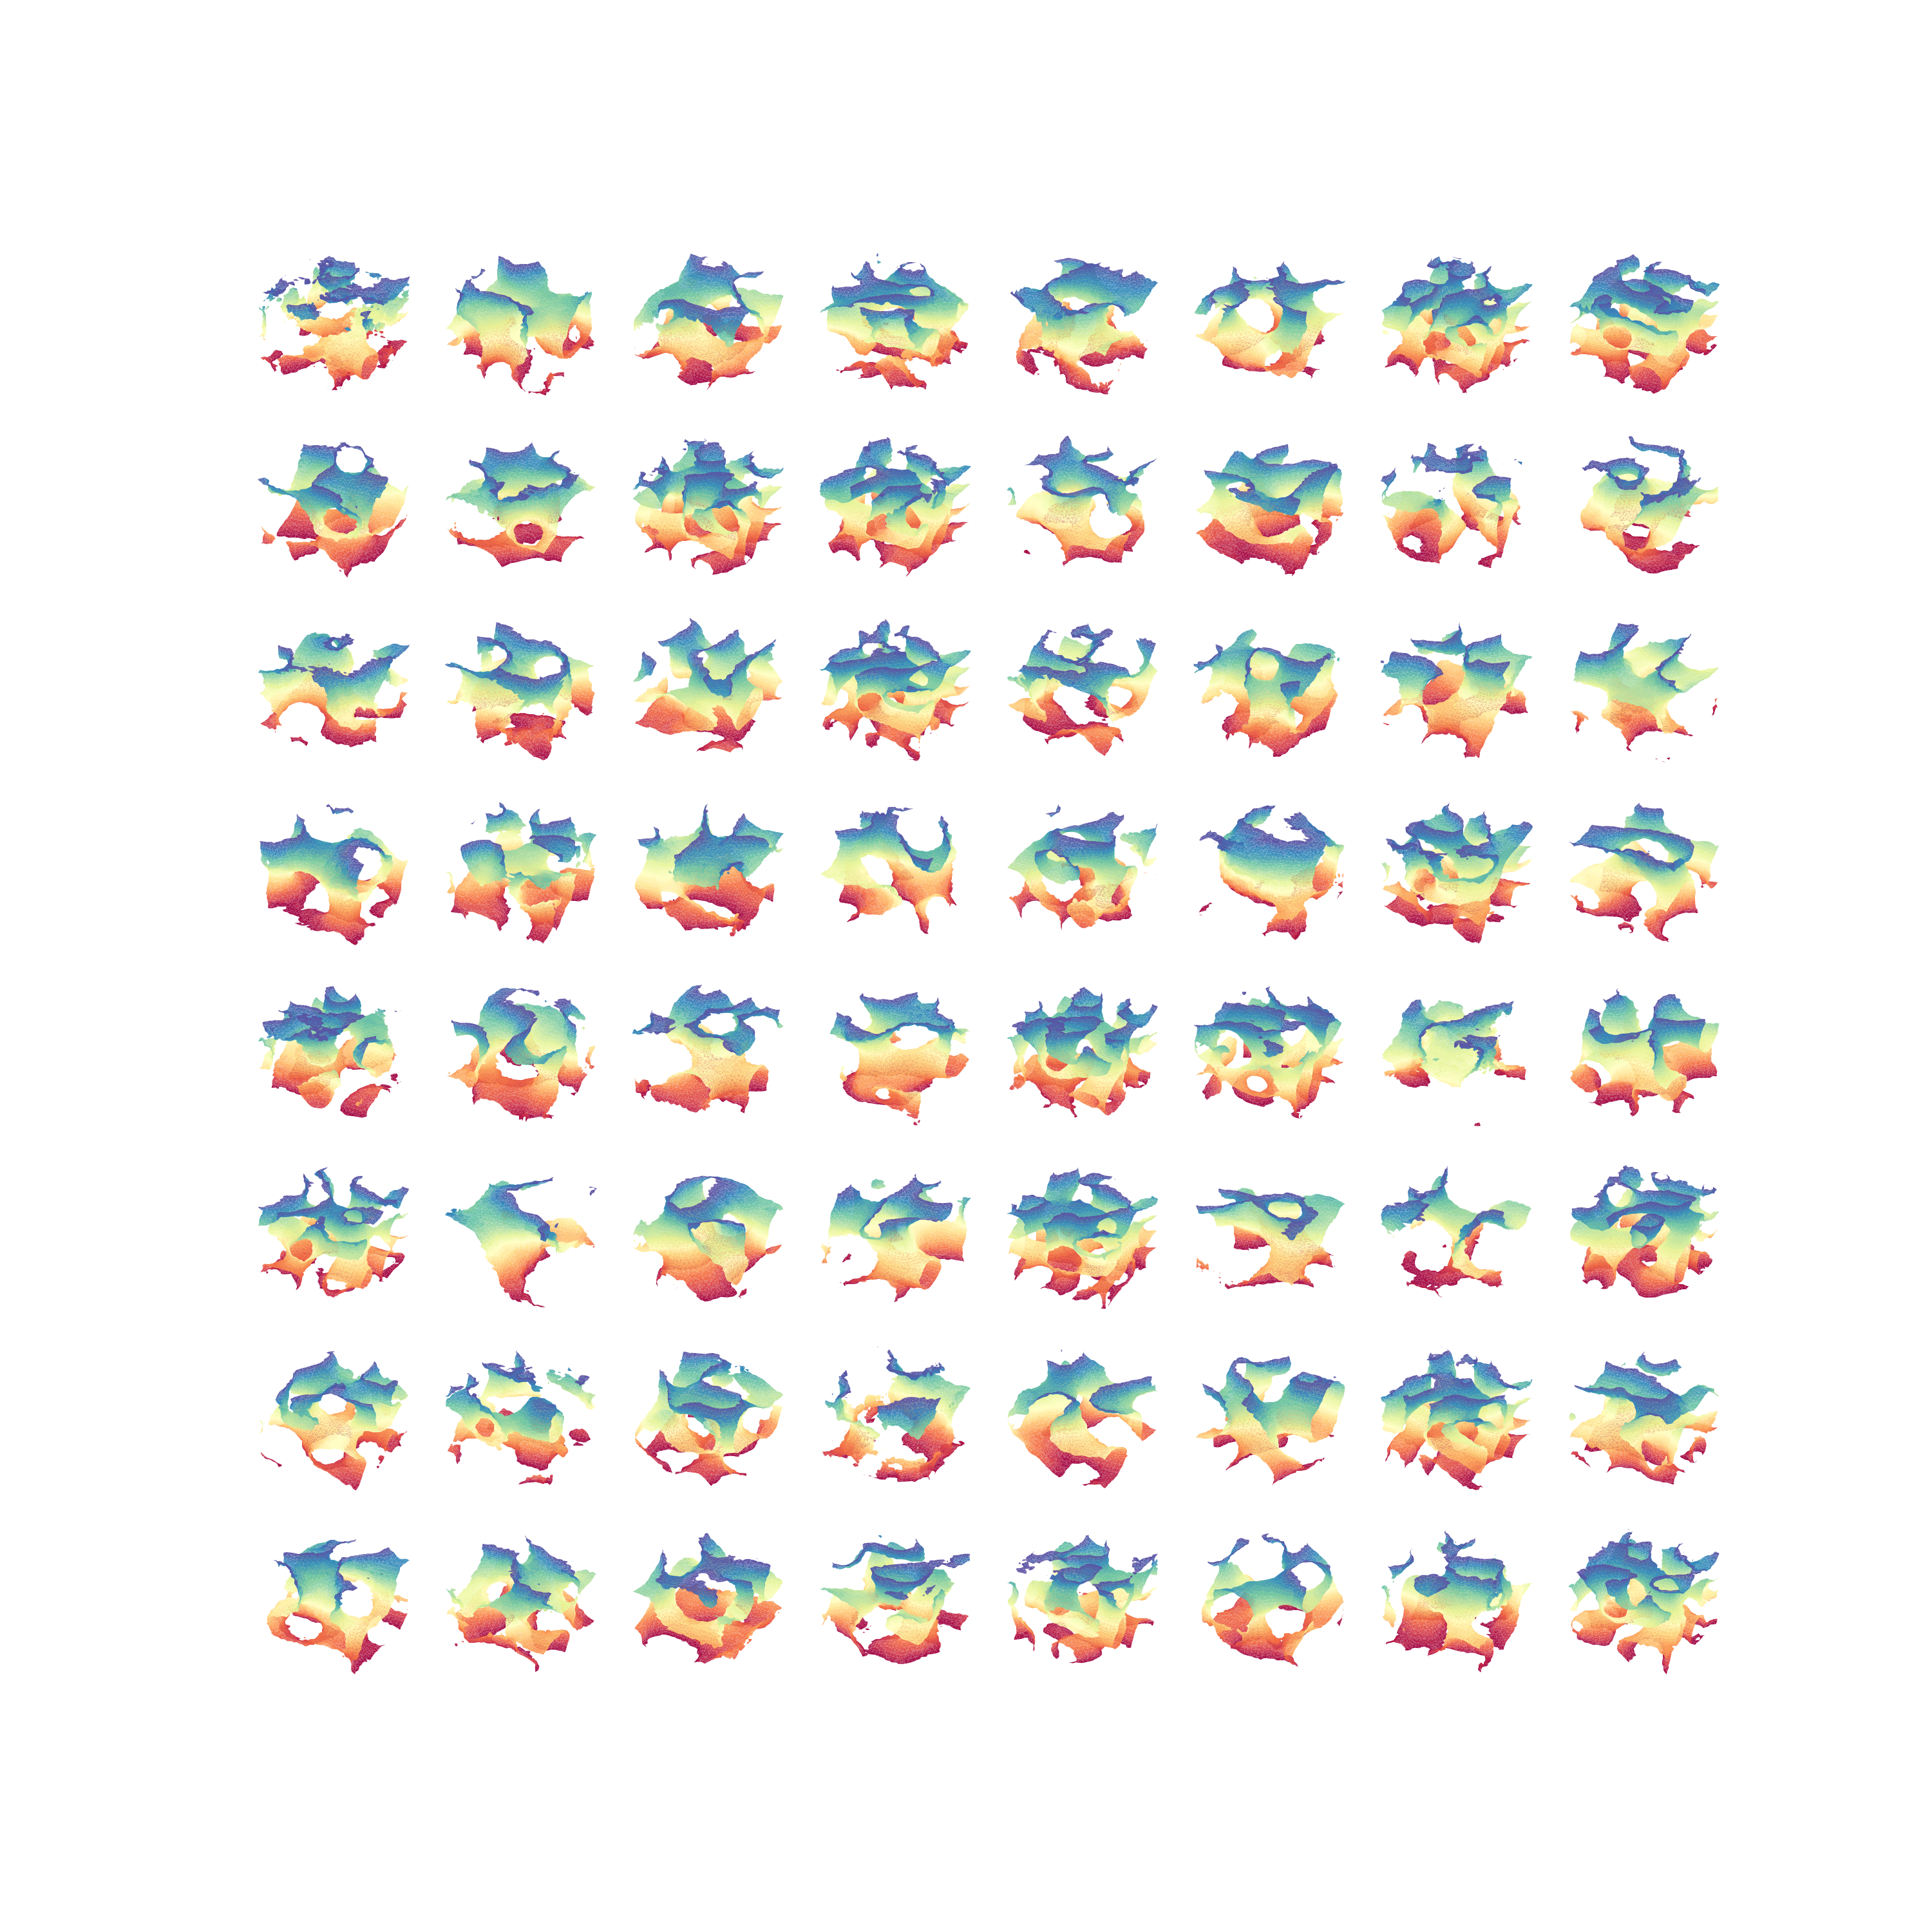

In [18]:
from IPython.display import Image, display

# Replace 'path/to/generated_image.png' with the actual path to your generated image
image_path = 'GANOutput2/isosurface_plot/79_142.png'

# Display the image
display(Image(filename=image_path))

Here we visualize an initial guess generated while training the GAN network.<br>
As we can see that the result is not as sharp as the final converged block would have been.<br>
The initial guess states would undergo SCFT calculations for several iterations until the error value is under the tolerance threshold<br>
Once that is achieved, the converged state would be generated.

## Generating Initial Guesses

Although above we displayed an initial guess, now we will generate multiple as the one above was just for display purpose.<br>
These will be used to evaluate the model.

In [19]:
# Function to save the generated docs as .rf files
def save_as_rf(fake, save_path):
    """
    Convert the generated tensor into the .rf format and save it.
    Parameters:
    - fake: The tensor generated from the GAN.
    - save_path: The path where to save the .rf file.
    """

    # Reshape and format the tensor data
    density_A = fake.reshape(-1, 1)
    density_AB = np.hstack((density_A, 1 - density_A))

    # Define header
    header = ('format   1   0\ndim\n          3\ncrystal_system\n'
              '              orthorhombic\nN_cell_param\n              3\n'
              'cell_param    \n      3.0e+00   3.0e+00  3.0e+00 \n'
              'group_name\n          P_1\nN_monomer\n          2\n'
              'ngrid\n                   32        32        32\n')
    # Write header and the tensor data to the file
    with open(save_path, 'w') as output_file:
        output_file.write(header)
        # Write the tensor data to the file
        np.savetxt(output_file, density_AB, delimiter='\t', fmt='%.16f')


# Function to generate docs
def generate_images(weight_path, out_dir, num_images):
    """
    Generate a set of 3D docs using the trained GAN generator.

    Parameters:
    - weight_path: Path to the pretrained generator weights.
    - out_dir: Output directory to save the generated .rf files.
    - num_images: Number of docs to generate.
    """
    # Ensure the output directory exists
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # Create a generator instance and load the weights
    generator = Generator().to(device)
    state_dict = torch.load(weight_path, map_location='cpu')
    # Handle cases where the state_dict keys have 'module.' prefix
    new_state_dict = {key.replace('module.', ''): value for key, value in state_dict.items()}
    generator.load_state_dict(new_state_dict)
    generator.eval()

    # Generate the specified number of docs
    with torch.no_grad():
        for i in range(num_images):
            # Assuming the generator takes random noise as input
            noise = torch.randn(1, 100, 1, 1, 1).to(device)

            # Generate a fake image
            fake_image = generator(noise)

            # Convert tensor to numpy array and save as .rf
            fake_cpu = fake_image.squeeze(0).cpu().numpy()
            save_path = os.path.join(out_dir, f'guess_{i + 1}.rf')
            save_as_rf(fake_cpu, save_path)

def main(args):
    weight_path = args.weight_path
    out_dir = args.out_dir
    num_images = args.num_images
    generate_images(weight_path, out_dir, num_images)

Random Seed:  500


In [29]:
# Class to take arguments for the main function
class PredictArgs:
    def __init__(self):
        self.weight_path = "GANOutput2/Models/Gweights_45_15.pt"
        self.out_dir = "GANOutput2/Initial_guess"
        self.num_images = 5000

predict_args = PredictArgs()

In [30]:
# Function to start training
def predict_initial_guesses():
    predict_args = PredictArgs()
    main(predict_args)

Here we are predicting Initial guessses for states as these would then later undergo SCFT calculation.<br>
The amount of initial guesses which yield perfect converged state would be considered viable.<br>
The rate is expected to be more than 10% as per the original paper

In [31]:
# Generate intial guessses for all states
predict_initial_guesses()

<ipython-input-19-dcc5c9b0c293>:73: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(weight_path, map_location='cpu')
